
# **<div style="text-align:center; vertical-align:middle">Fetal Health Classification</div>**


## 1 | **Introduction**

 #### **Important Concepts**
 ##### *Fetal Heart Rate*
  >Healthcare providers measure fetal heart rate by the number of fetal (baby) heartbeats per minute (BPM) during pregnancy. This measurement helps healthcare providers determine the well-being of the fetus during prenatal visits or labor.
  >

**<div style="text-align:center; vertical-align:middle">LETS GO →</div>**

In [ ]:
# some library for manipulation
import pandas as pd
import numpy as np

# some library for visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# some metrics
from sklearn.metrics import mean_squared_error,explained_variance_score,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report

# some transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# some models
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from time import time
from sklearn import metrics

In [2]:
# read data
df = pd.read_csv('fetal_health.csv')

#### Take a close view about data

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

* All features are the same type which is float
* There are no missing values

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [7]:
df.nunique().to_frame(name='Num of Unique')

,Num of Unique
baseline value,48
accelerations,20
fetal_movement,102
uterine_contractions,16
light_decelerations,16
severe_decelerations,2
prolongued_decelerations,6
abnormal_short_term_variability,75
mean_value_of_short_term_variability,57
percentage_of_time_with_abnormal_long_term_variability,87


In [8]:
df['fetal_health'].value_counts().to_frame()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


## 2|  EDA

In [9]:
df['severe_decelerations'].value_counts()

severe_decelerations
0.000    2119
0.001       7
Name: count, dtype: int64

`exist difference value in classs severe decelerations`

In [10]:
df.groupby('fetal_health')['severe_decelerations'].value_counts()

fetal_health  severe_decelerations
1.0           0.000                   1654
              0.001                      1
2.0           0.000                    295
3.0           0.000                    170
              0.001                      6
Name: count, dtype: int64

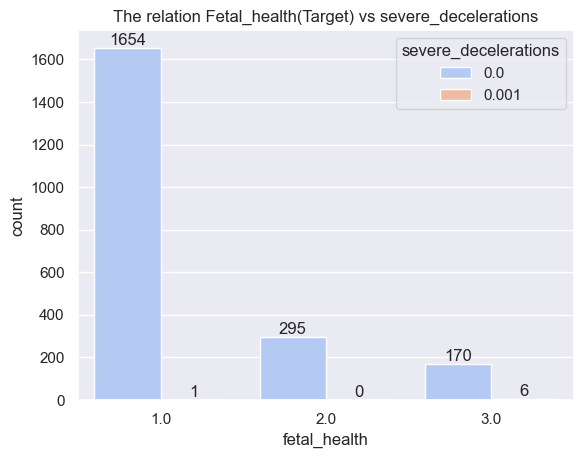

In [11]:
sns.set()
plot = sns.countplot(data=df ,x= 'fetal_health',hue='severe_decelerations',palette="coolwarm")

for i in plot.containers:
    plot.bar_label(i)

plt.title('The relation Fetal_health(Target) vs severe_decelerations')   ; 


* The fetal health class [1.0] don't have a .001 [severe_decelerations]
* The fetal health class [2.0] don't have a .001 [severe_decelerations]
* The fetal health class [3.0] have both 

---- baseline value is a Fetal Heart Rate

In [12]:
df.groupby('fetal_health')["baseline value"].value_counts(normalize=True)

fetal_health  baseline value
1.0           122.0             0.064048
              133.0             0.059819
              130.0             0.056193
              125.0             0.051964
              138.0             0.047734
                                  ...   
3.0           152.0             0.011364
              141.0             0.005682
              125.0             0.005682
              137.0             0.005682
              136.0             0.005682
Name: proportion, Length: 107, dtype: float64

In [53]:
mean_h = df['baseline value'].mean()


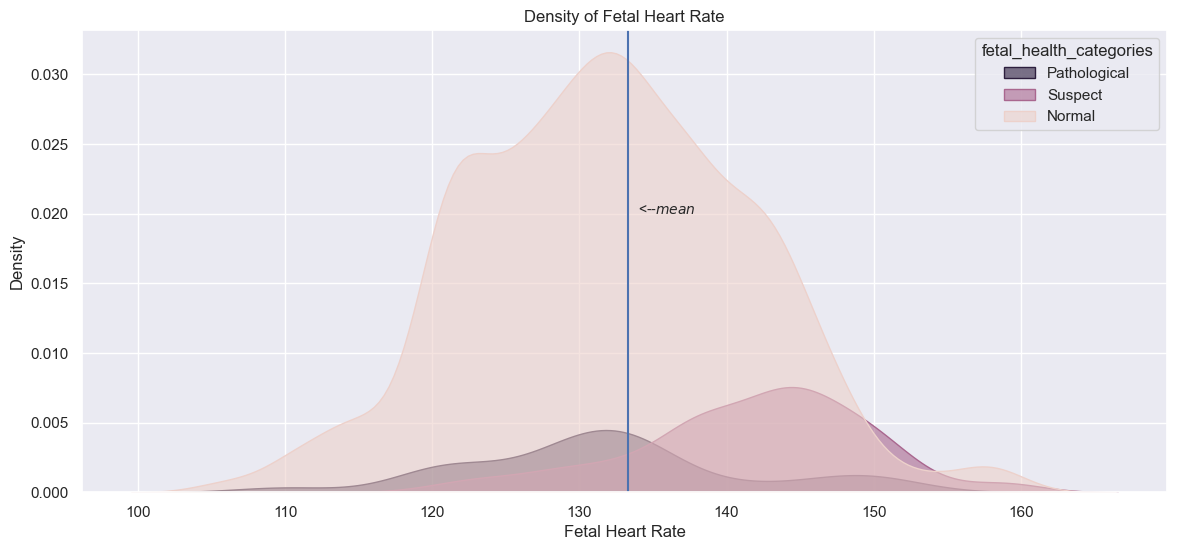

In [55]:
_,ax = plt.subplots(figsize = (14,6))

sns.kdeplot(data = df , x= "baseline value",alpha=0.6, fill =True ,ax = ax,hue = 'fetal_health')


plt.legend(['Pathological','Suspect','Normal'],title = 'fetal_health_categories')
plt.axvline(mean_h,label = 'mean')
plt.text(134, .02, '<--$mean$', fontsize = 10)

plt.xlabel('Fetal Heart Rate')
plt.title('Density of Fetal Heart Rate');

* Normal and Pathological  fetal health have a normal distributions of Heart Rate
* Suspect has left-skewed

`Acceleratoins` 

Fetal heart accelerations are an indication of normal neurological function, mediated through the somatic nervous system. In a study investigating the association of accelerations with fetal movements, 52 fetuses under CTG surveillance were simultaneously scanned by ultrasound. The study demonstrated that 99.6% of large accelerations and 82.4% of small accelerations were associated with concurrent fetal movements 26. Conversely, the absence of accelerations has been noted during fetal sleep cycles. This physiological phenomenon may reflect the parasympathetic dominance during periods of rest

In [14]:
df['accelerations'].value_counts().to_frame()

,count
accelerations,
0.000,894
0.003,161
0.002,160
0.001,143
0.004,117
0.006,112
0.005,110
0.008,103
0.007,91


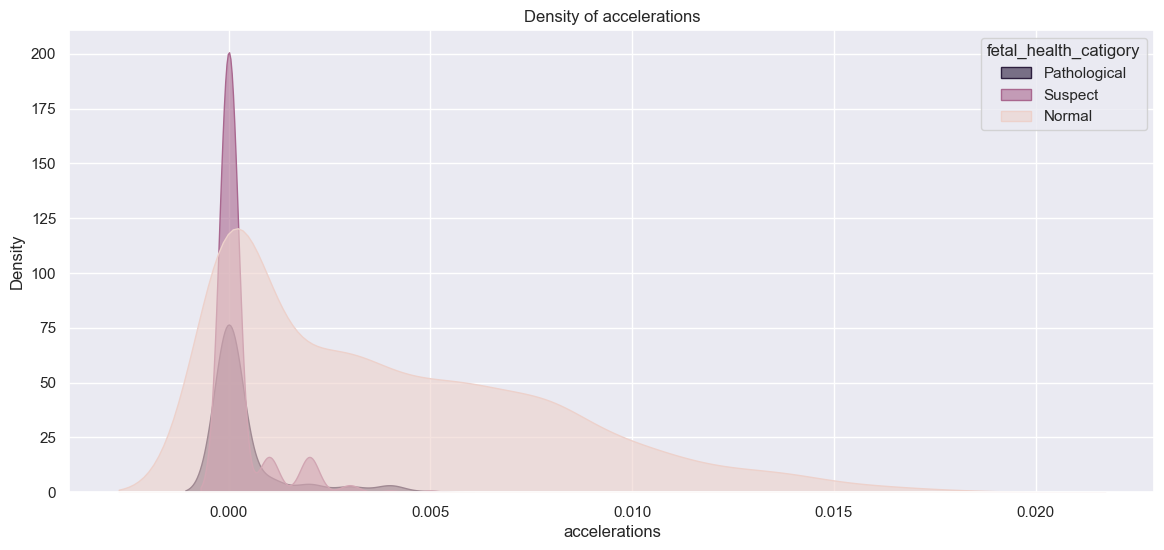

In [15]:
_,ax = plt.subplots(figsize = (14,6))

sns.kdeplot(data = df , x= "accelerations",alpha=0.6, fill =True ,ax = ax,hue = 'fetal_health')


plt.legend(['Pathological','Suspect','Normal'],title = 'fetal_health_catigory')


plt.title('Density of accelerations');

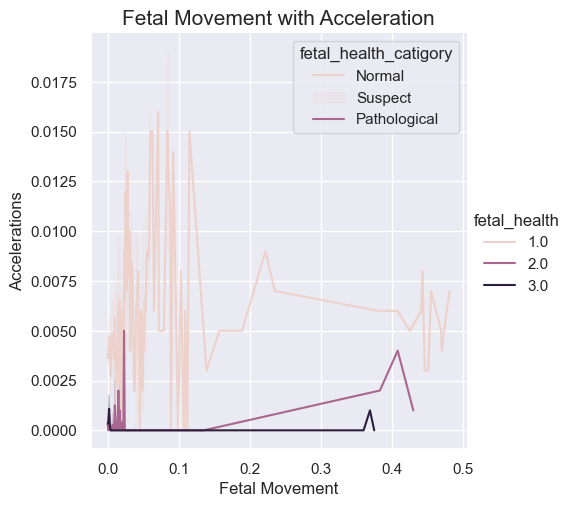

In [16]:
sns.set_style('darkgrid')

sns.relplot(x="fetal_movement", y="accelerations", hue="fetal_health", kind="line", data=df) 
plt.title('Fetal Movement with Acceleration', fontsize = 15)

plt.xlabel('Fetal Movement')
plt.ylabel('Accelerations')
plt.legend(['Normal','Suspect','Pathological'],title = 'fetal_health_catigory')
plt.show()

There is a relation between normal fetal and Movement depend on Acceleration

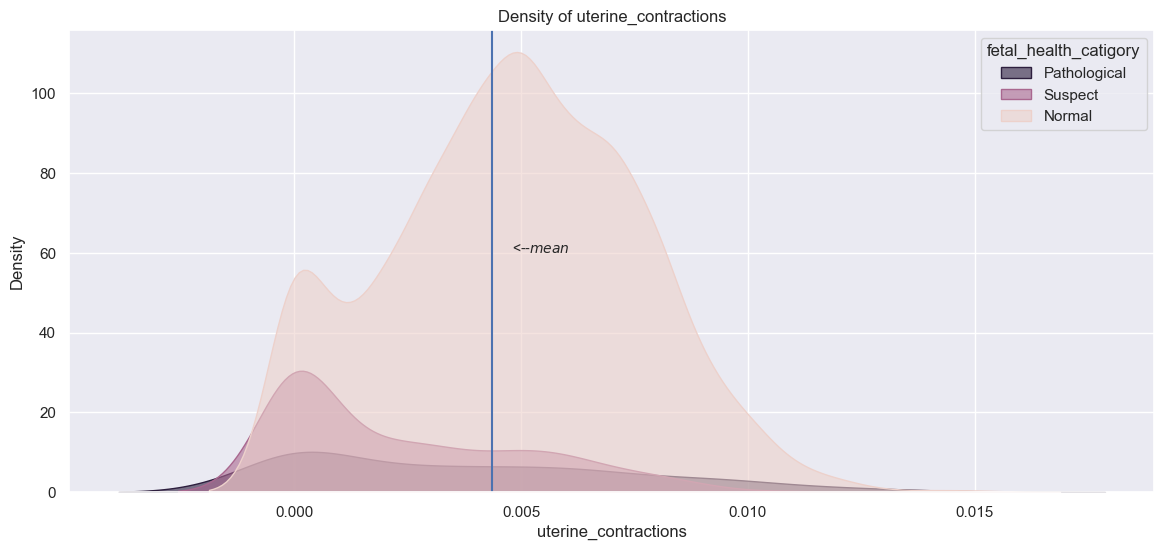

In [61]:


_,ax = plt.subplots(figsize = (14,6))

sns.kdeplot(data = df , x= "uterine_contractions",alpha=0.6, fill =True ,ax = ax,hue = 'fetal_health')
mena_u = df['uterine_contractions'].mean()
plt.axvline(mena_u,label = 'mean')
plt.text(.0048, 60, '<--$mean$', fontsize = 10)

plt.legend(['Pathological','Suspect','Normal'],title = 'fetal_health_catigory')


plt.title('Density of uterine_contractions');

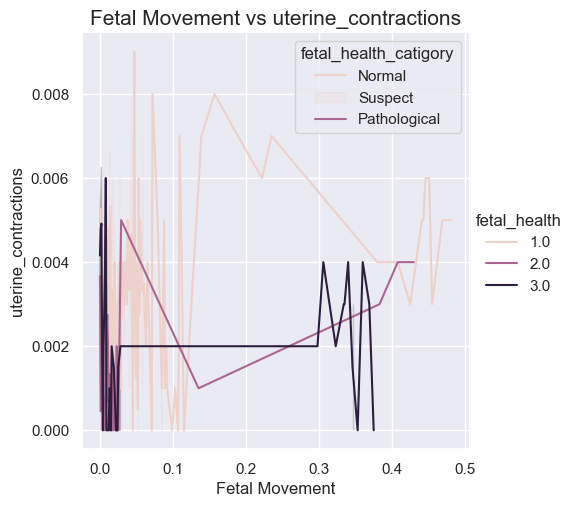

In [18]:
sns.set_style('darkgrid')

sns.relplot(x="fetal_movement", y="uterine_contractions",hue="fetal_health", kind="line", data=df) 
plt.title('Fetal Movement vs uterine_contractions', fontsize = 15)

plt.xlabel('Fetal Movement')
plt.ylabel('uterine_contractions')
plt.legend(['Normal','Suspect','Pathological'],title = 'fetal_health_catigory')
plt.show()

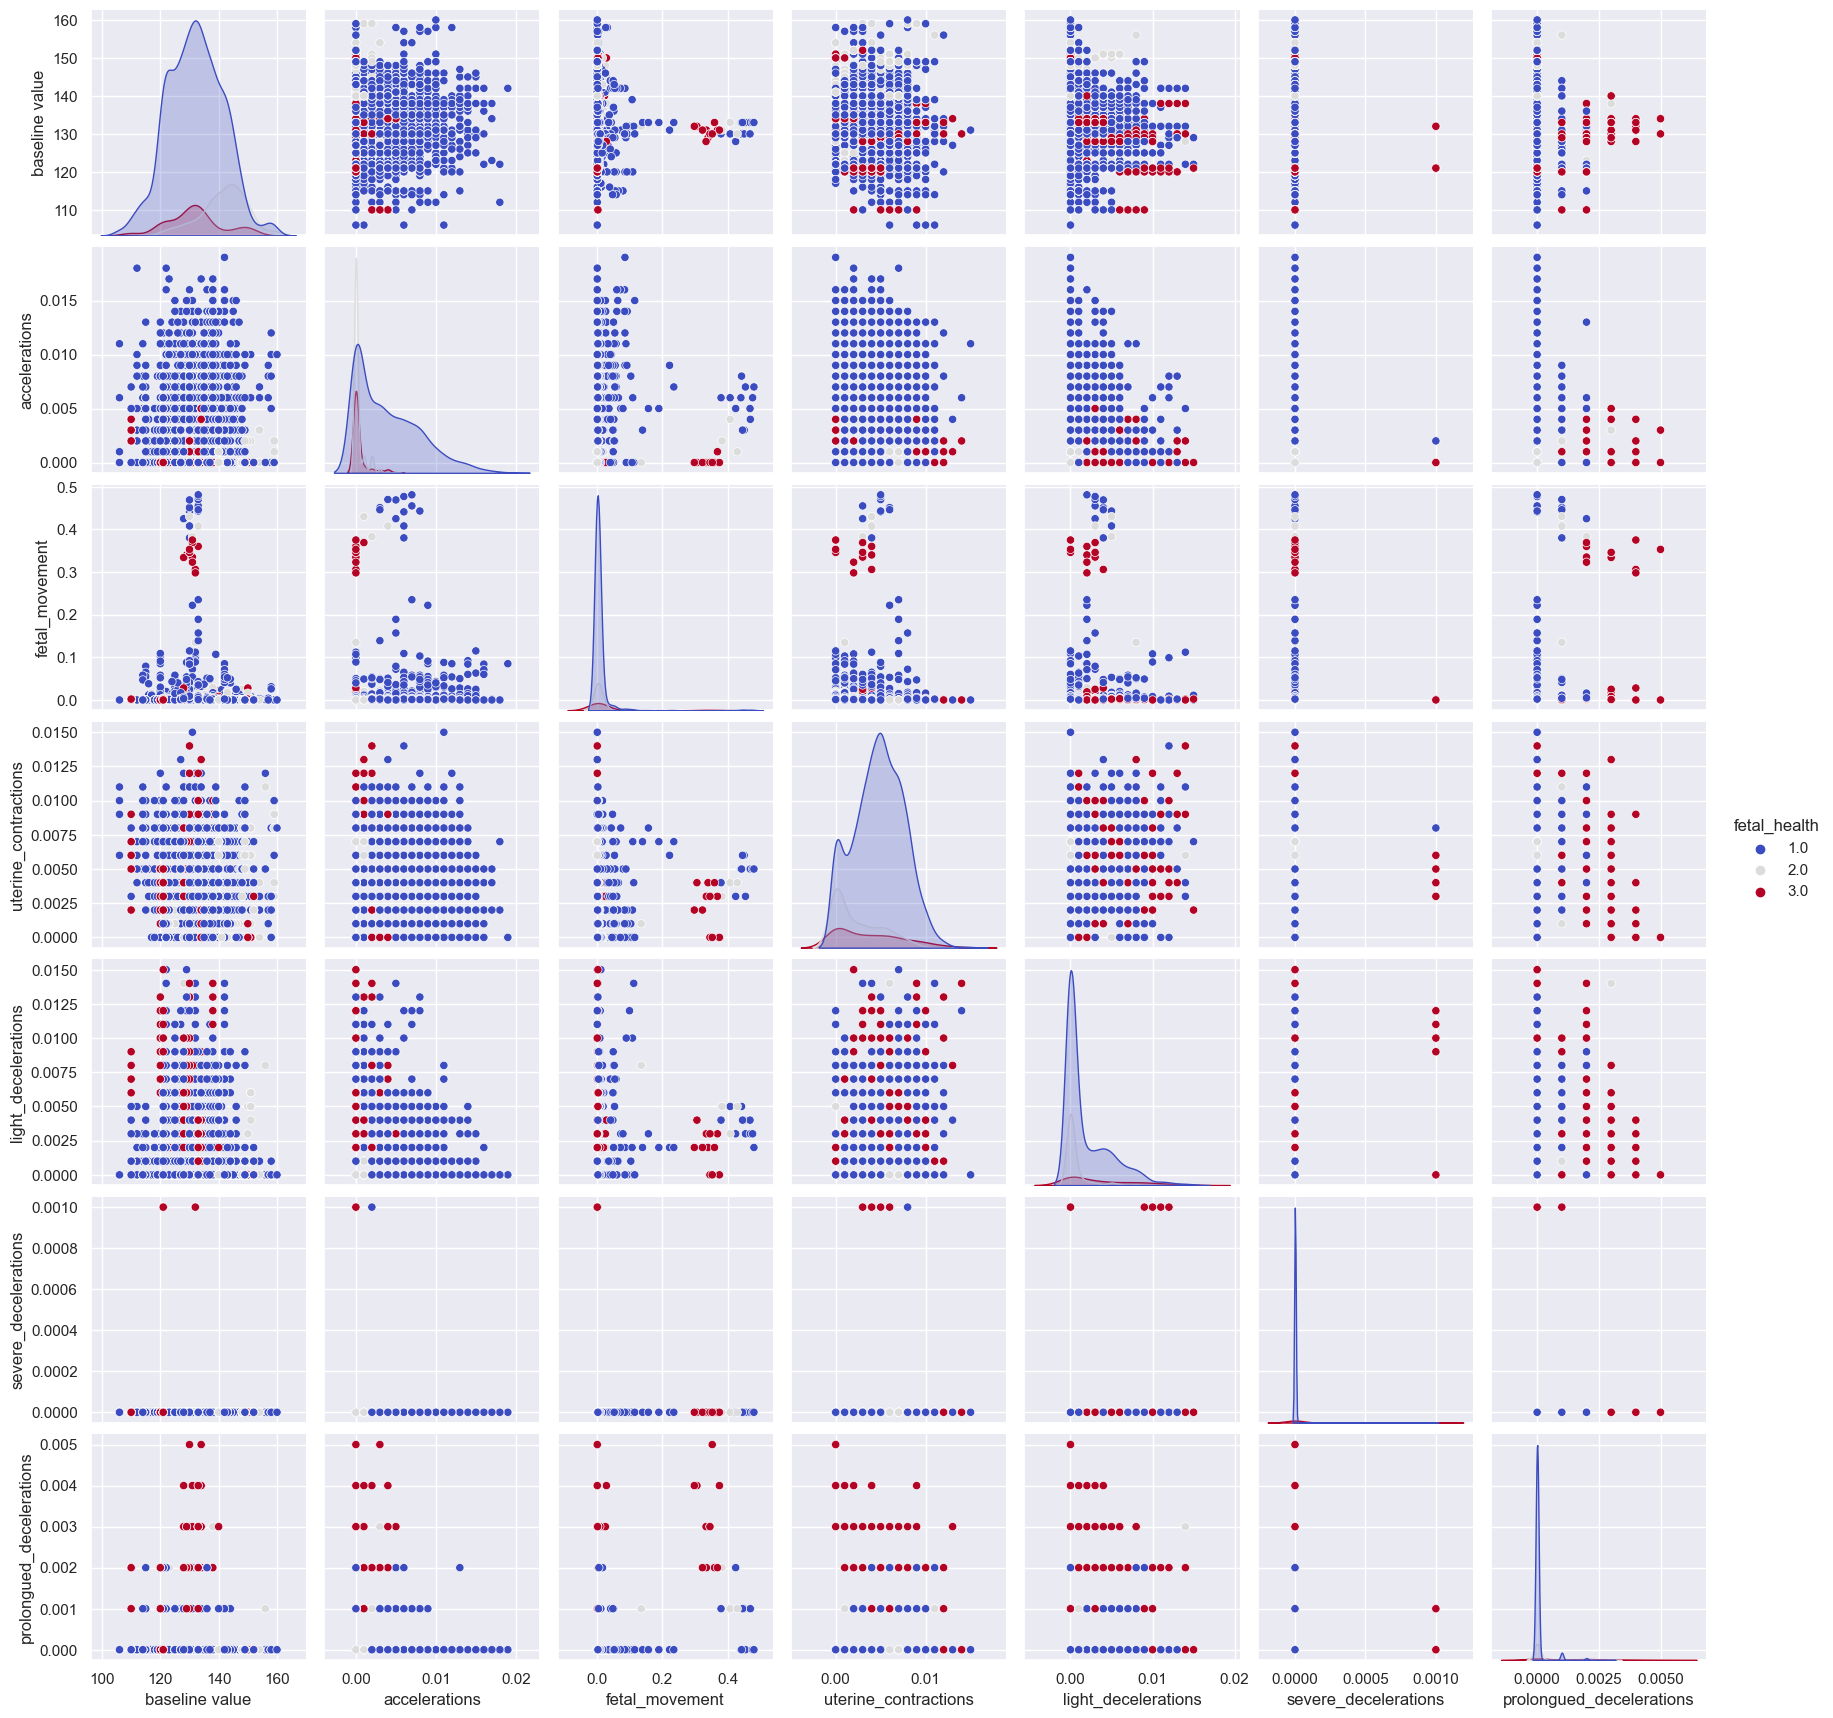

In [67]:

features = ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','fetal_health']

sns.pairplot(df[features],hue ='fetal_health',palette = "coolwarm")


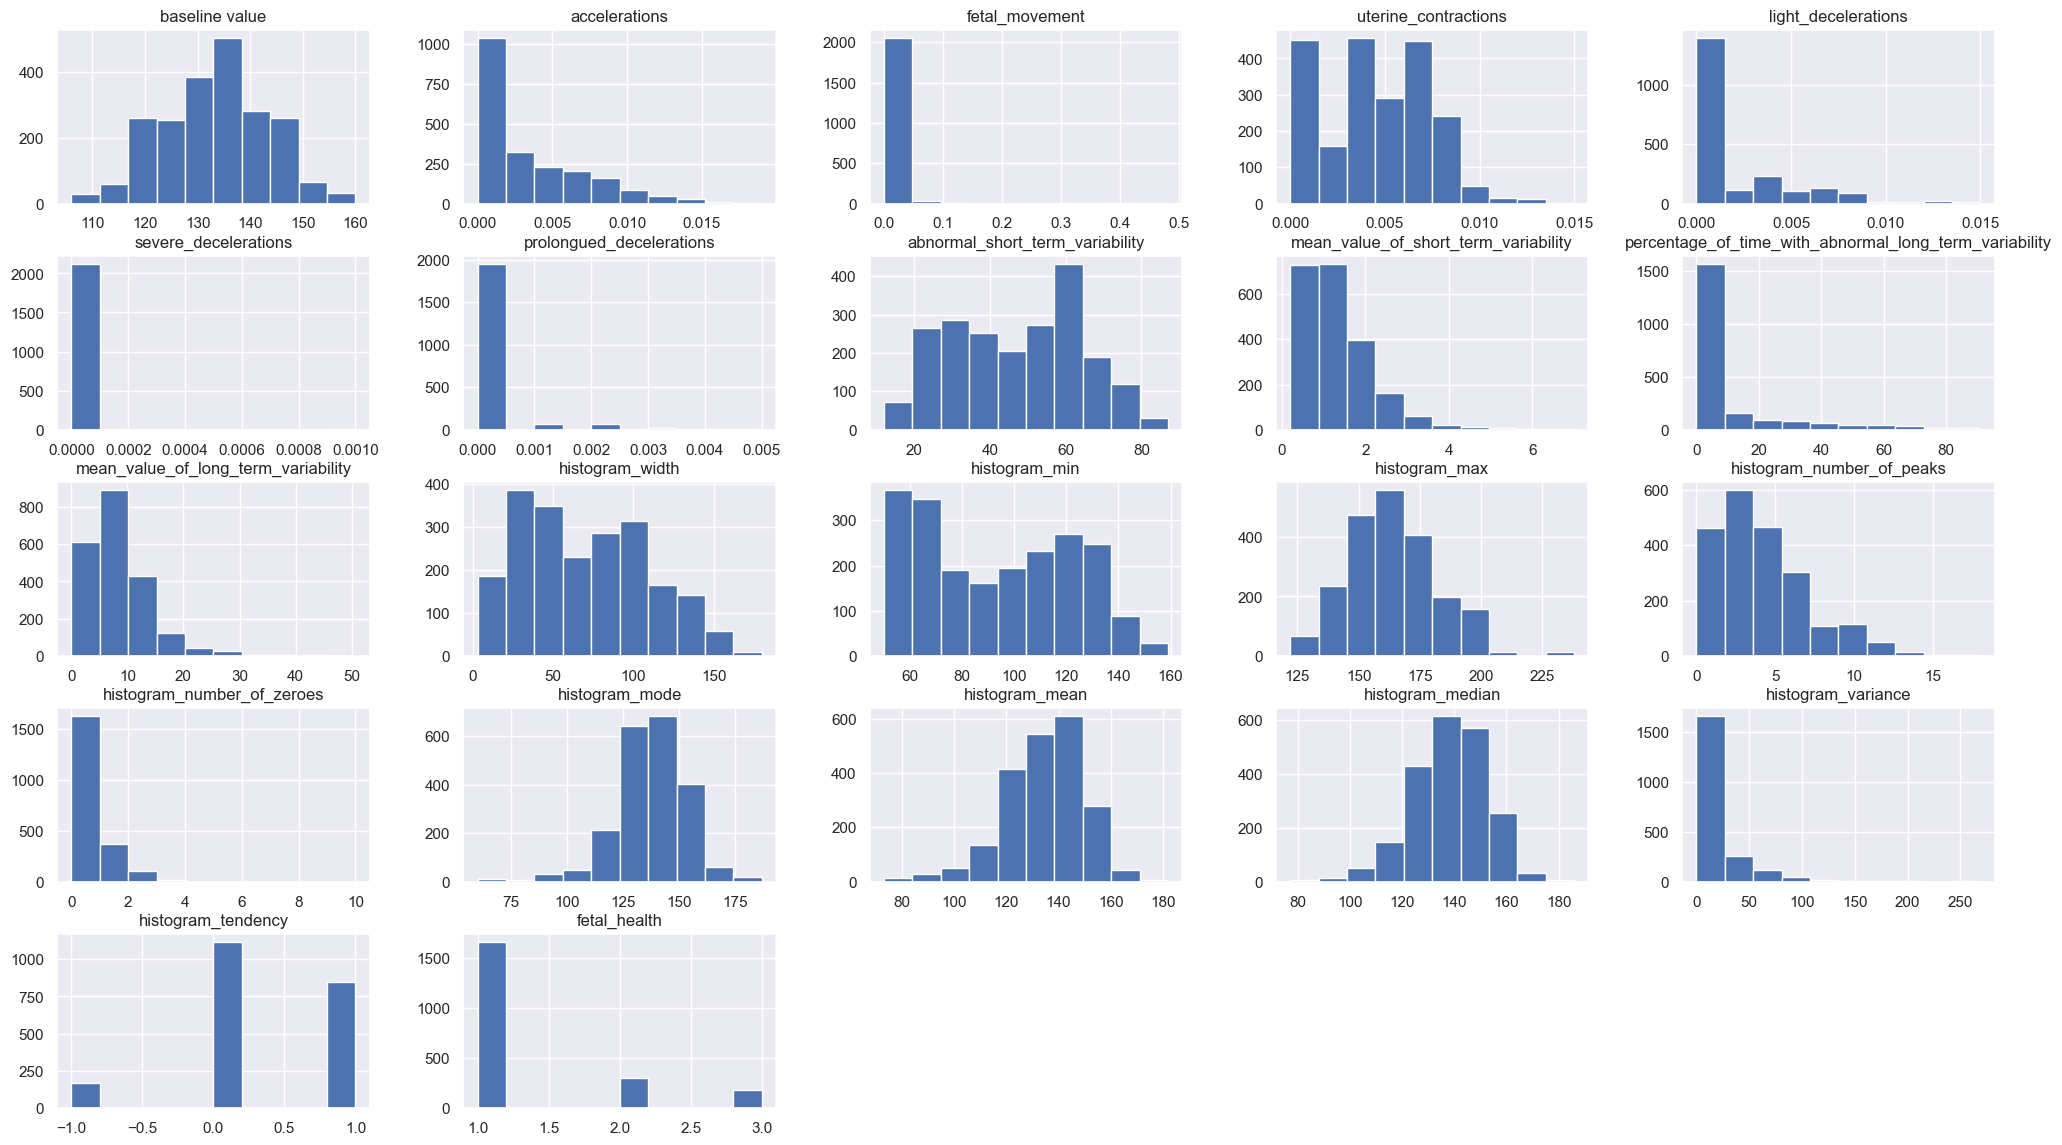

In [ ]:
df.hist( figsize = (25,14))
plt.show()

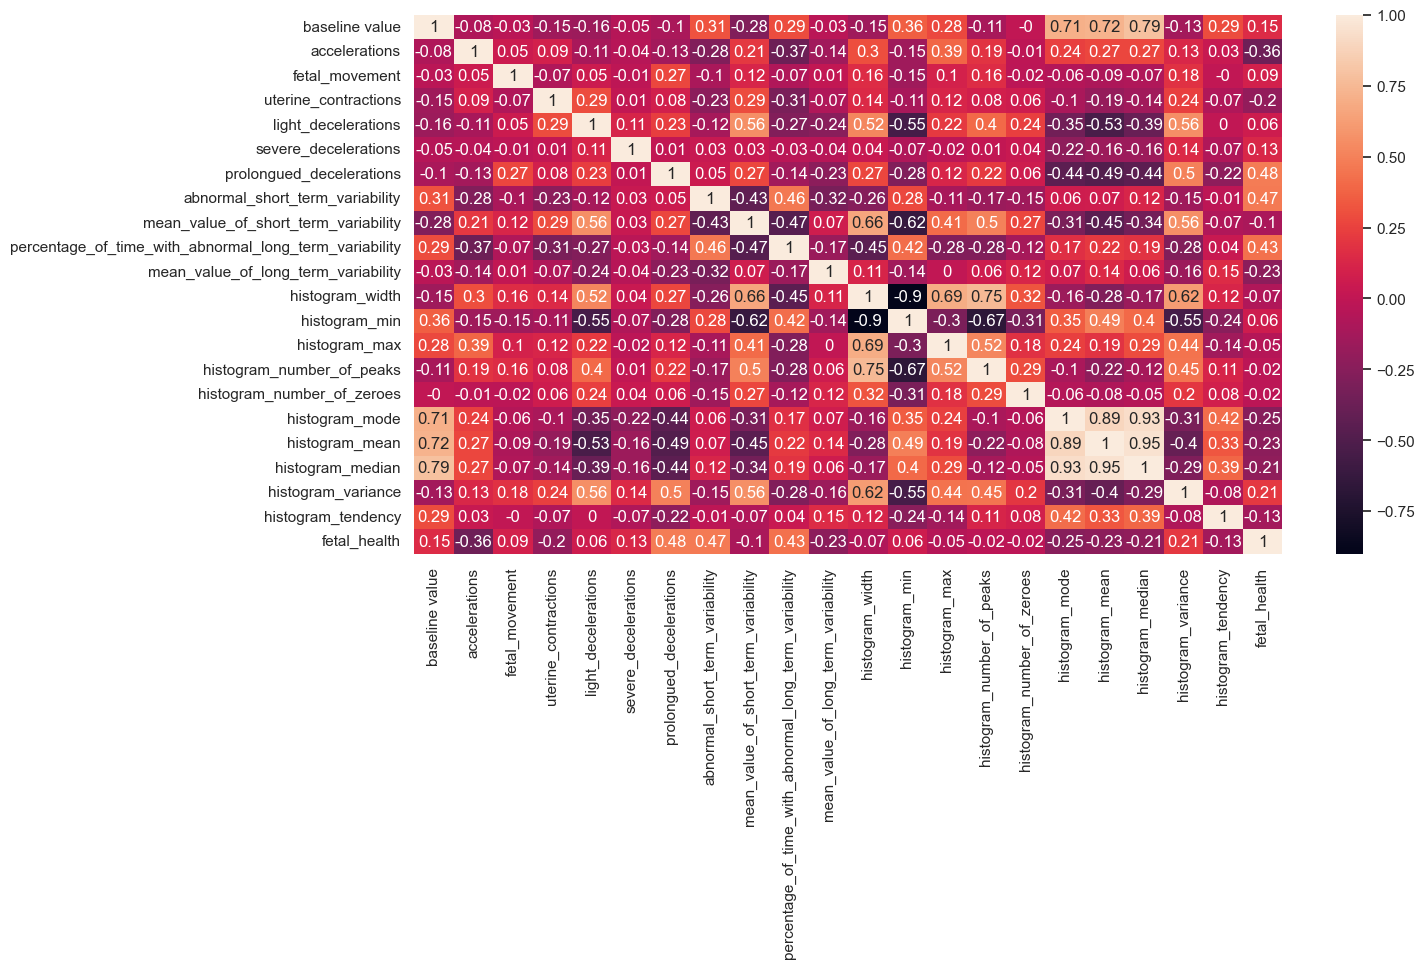

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'rocket')
plt.show()

In [ ]:
df.corr()['fetal_health'].to_frame().sort_values(by = 'fetal_health',ascending=False)

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


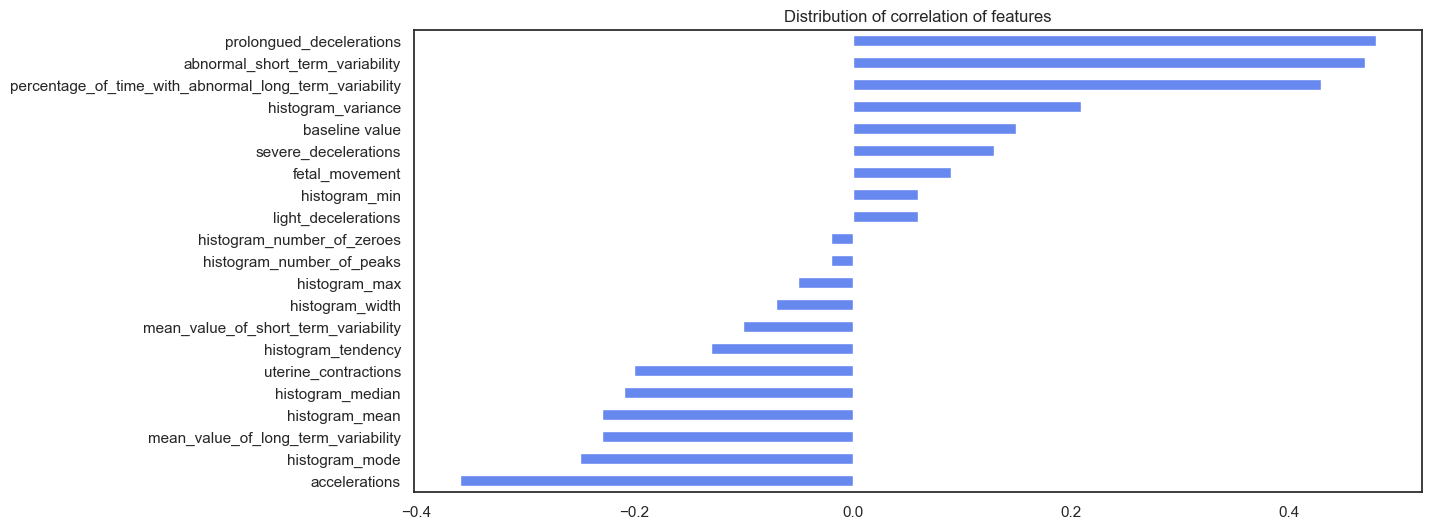

In [ ]:
sns.set_style('white')
sns.set_palette('coolwarm')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
correlation['fetal_health'].sort_values()[:-1].plot.barh()
plt.show()

## 3 | Build model

In [ ]:
X  = df.drop(columns=['fetal_health'],axis = 1)
y = df['fetal_health']

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle = True,test_size=.2,random_state = 42)

In [ ]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (1700, 21)
Shape of testing feature: (426, 21)
Shape of training label: (1700,)
Shape of testing label: (426,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average='macro')
    rec = metrics.recall_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')


   # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,'cm': cm,'y_predict':y_pred}

LogisticRegression()
	Training time: 0.116s
	Prediction time: 0.224s
	Explained variance: 0.6672523339378064
	Mean square error: 0.1288235294117647
	R2 score: 0.6665995029887837


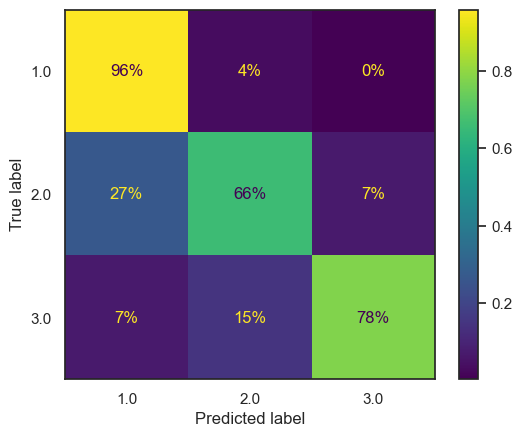


KNeighborsClassifier()
	Training time: 0.010s
	Prediction time: 0.436s
	Explained variance: 0.6047336960171938
	Mean square error: 0.1564705882352941
	R2 score: 0.59504779815076


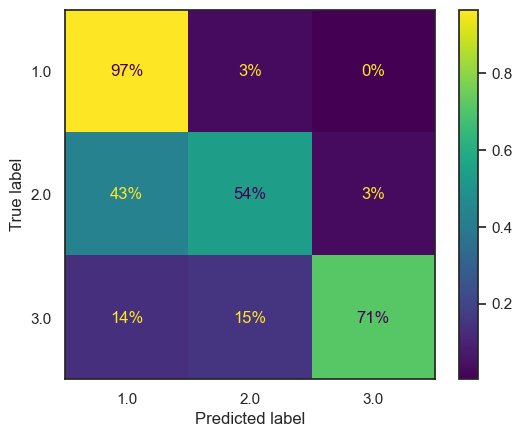


GaussianNB()
	Training time: 0.003s
	Prediction time: 0.011s
	Explained variance: 0.2653735419884926
	Mean square error: 0.32176470588235295
	R2 score: 0.16725994582129966


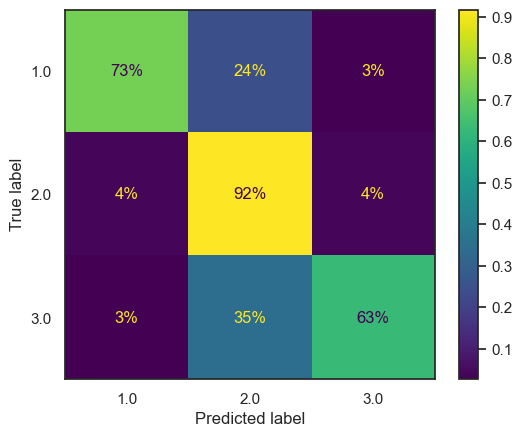


DecisionTreeClassifier()
	Training time: 0.020s
	Prediction time: 0.049s
	Explained variance: 0.6743869075603913
	Mean square error: 0.12588235294117647
	R2 score: 0.6742113864821904


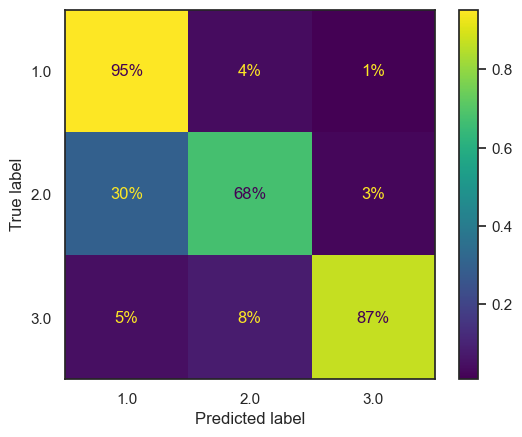


RandomForestClassifier()
	Training time: 0.648s
	Prediction time: 1.451s
	Explained variance: 0.7401831329616944
	Mean square error: 0.10176470588235294
	R2 score: 0.7366288311281259


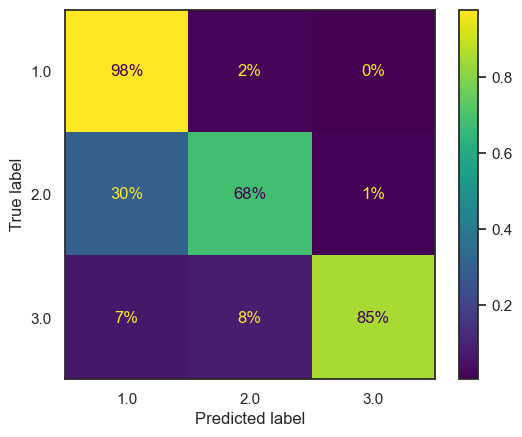


SGDClassifier()
	Training time: 0.049s
	Prediction time: 0.067s
	Explained variance: 0.5670217386437415
	Mean square error: 0.16823529411764707
	R2 score: 0.5646002641771329


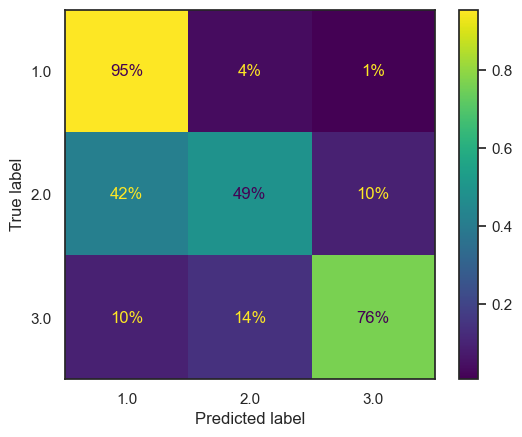


SVC()
	Training time: 0.075s
	Prediction time: 0.249s
	Explained variance: 0.6517124499070902
	Mean square error: 0.13647058823529412
	R2 score: 0.646808605905926


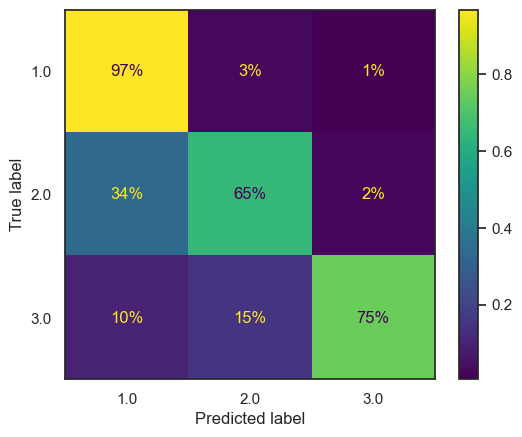

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict,cross_val_score
regressors = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(),
    SVC()
]


for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = cross_val_predict(model,X_train,y_train,cv=3)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_train,y_pred))
    print("\tMean square error:", mean_squared_error(y_train,y_pred))
    print("\tR2 score:", r2_score(y_train,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_train,y_pred,normalize='true',values_format='.00%')
    plt.show()
    print()





In [ ]:
model_rondom = RandomForestClassifier()

model_rondom.fit(X_train,y_train)
evaluate = evaluate_model(model_rondom,X_test,y_test)



In [ ]:
container = pd.Series({'Accuracy':evaluate['acc'],'Precision':evaluate['prec'],'Recall':evaluate['rec'],'F1 Score':evaluate['f1']  }, name = 'Result').to_frame()
container

,Result
Accuracy,0.953052
Precision,0.921336
Recall,0.908505
F1 Score,0.914126


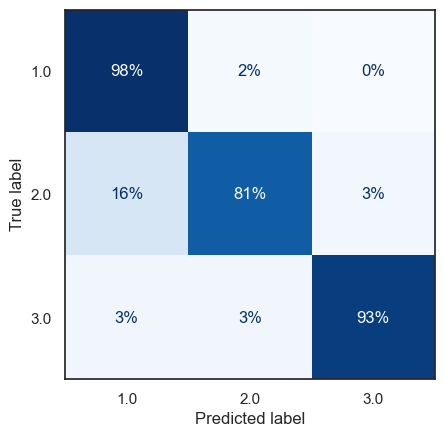

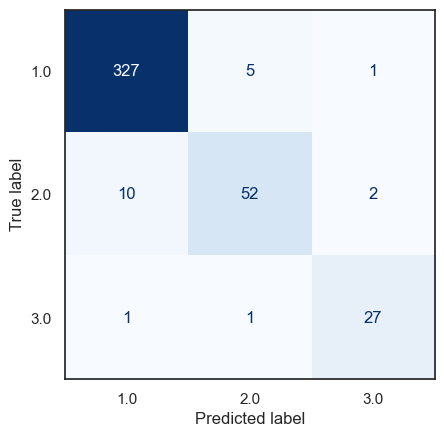

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test,evaluate['y_predict'],normalize='true',values_format='.00%',cmap = 'Blues',colorbar = False)

ConfusionMatrixDisplay.from_predictions(y_test,evaluate['y_predict'],cmap = 'Blues',colorbar = False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', 'entropy', 'log_loss'],'max_depth':range(1,25)}

grid_frost = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,verbose=3)

grid_frost.fit(X_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END .......criterion=gini, max_depth=1;, score=0.779 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=1;, score=0.779 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=1;, score=0.776 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=1;, score=0.776 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=1;, score=0.776 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.871 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.856 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.829 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.826 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.868 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.891 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=3

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 25)},
             verbose=3)

In [ ]:
grid_frost.best_params_

{'criterion': 'log_loss', 'max_depth': 22}

In [ ]:
predict_value = grid_frost.predict(X_test)

In [ ]:
print(classification_report(y_test,predict_value))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.88      0.80      0.84        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.91      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426



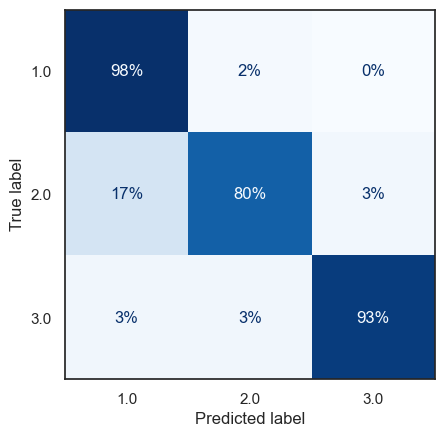

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_value,normalize='true',values_format='.0%',cmap = 'Blues',colorbar = False)


**<div style="text-align:center; vertical-align:middle">THE END  🙋‍♂️</div>**